<a href="https://colab.research.google.com/github/monu111/Gender-Classification-by-using-names/blob/main/Gender_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/Colab Notebooks/Gender classification  

/content/drive/MyDrive/Colab Notebooks/Gender classification


# 1. Importing the libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

import warnings
warnings.filterwarnings('ignore')

# 2. loading the dataset

In [ ]:
df = pd.read_csv('name_gender.csv')
df.head()

,Aaban,M,1
0,Aabha,F,1.0
1,Aabid,M,1.0
2,Aabriella,F,1.0
3,Aada,F,1.0
4,Aadam,M,1.0


### 2.1 Renaming the columns

In [ ]:
df.columns = ['name', 'gender', 'score'] # renaming the columns

In [ ]:
df.head()

,name,gender,score
0,Aabha,F,1.0
1,Aabid,M,1.0
2,Aabriella,F,1.0
3,Aada,F,1.0
4,Aadam,M,1.0


### 2.2 Shape of the dataset

In [ ]:
df.shape

(95024, 3)

- There are total 95024 samples and 3 features

### 2.3 Checking the missing values

In [ ]:
df.isnull().sum()

name      0
gender    0
score     0
dtype: int64

- There is no missing values.

### 2.4 Checking the dtype of dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95024 entries, 0 to 95023
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   name    95024 non-null  object 
 1   gender  95024 non-null  object 
 2   score   95024 non-null  float64
dtypes: float64(1), object(2)
memory usage: 2.2+ MB


### 2.5 Distribution of male and female

In [ ]:
v = df['gender'].value_counts()
print(v)

F    60304
M    34720
Name: gender, dtype: int64


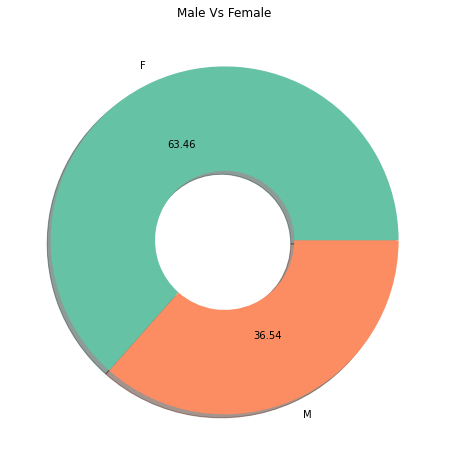

In [ ]:
 
fig  =plt.gcf()
fig.set_size_inches((10,8))
cmap = plt.get_cmap('Set2')
color=  cmap(np.arange(len(v)))
plt.pie(v,labels = v.index ,autopct = '%0.02f', colors = color, shadow = True, wedgeprops = dict(width = 0.6), radius = 1)
plt.title('Male Vs Female')
plt.show()

- From the observation,  there are total 60304(63.46%) Female and 34720 are Male(36.54% ).

# 3. Text Preprocessing

### 3.1 Encoding of Gender columns

In [ ]:
df.gender[df.gender == 'M'] = 1 # male is  1
df.gender[df.gender == 'F'] = 0 # female is 0


### 3.2 making a list of names and labels

In [ ]:
name = list(df.name)
labels = list(df.gender)

In [ ]:
name[:3] # checking

['Aabha', 'Aabid', 'Aabriella']

In [ ]:
labels[:5]

[0, 1, 0, 0, 1]

### 3.3 Applying countvectorizer

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(analyzer = 'char')

In [ ]:
names = cv.fit_transform(name).toarray()

In [ ]:
names[:5]

array([[3, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0],
       [2, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0],
       [3, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        0, 0, 0, 0],
       [3, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0],
       [3, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0]])

In [ ]:
len(names[2]) ## length of names

26

### 3.4 Splitting data into train and test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(names, labels, test_size = .3, random_state = 42)

# 4. Modeling

### 4.1 Applying MultinomialNB

In [ ]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()

model.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

#### 4.1.1 Predict the test set

In [ ]:
y_pred = model.predict(X_test)


#### 4.1.2 Evaluating the performance

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.7040479865300968

### 4.2 Applying LSTM

#### 4.2.1 Applying tokenizer

In [ ]:
from keras_preprocessing.text import Tokenizer
tokenizer = Tokenizer(char_level = True) # To convert text into numbers we have a class in keras called Tokenizer.

tokenizer.fit_on_texts(name)   # fit_on_text method accepts only list

sequence_of_int = tokenizer.texts_to_sequences(name)  # it converts the generated tokens in the sequence.

In [ ]:
sequence_of_int[:3]  # 

[[1, 1, 18, 8, 1], [1, 1, 18, 4, 12], [1, 1, 18, 5, 4, 2, 6, 6, 1]]

- From the above example we can clearly see the sequence of the text that we have feeded to the Tokenizer is now converted in the sequence of numbers. 

#### 4.2.2 Applying padding

Padding: add 0 in the begining or at end of the sentence to make all sentence of the same length. 

In [ ]:
from keras.preprocessing.sequence import pad_sequences
padsequences = pad_sequences(sequence_of_int, maxlen = 15, padding = 'post')


In [ ]:
padsequences[0]  # checking 1st value

array([ 1,  1, 18,  8,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
      dtype=int32)

In [ ]:
padsequences.shape

(95024, 15)

### 4.2.3 to_categorical

In [ ]:
from keras.utils.np_utils import to_categorical
labels = to_categorical(labels)

### 4.2.4 Splitting the data into train and test set

In [ ]:
from sklearn.model_selection import train_test_split
feature_train,feature_test,label_train,label_test=train_test_split(padsequences,labels,test_size=0.1,random_state=42)

###  4.2.5 Importing necessary library for LSTM

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding, Dropout

In [ ]:
model=Sequential()
model.add(Embedding(27,64,input_length=15))
#model.add(LSTM(2048,return_sequences=True))
model.add(LSTM(256,return_sequences=False))
model.add(Dropout(0.3))
model.add(Dense(2,activation='sigmoid'))
model.compile(loss = 'binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 15, 64)            1728      
_________________________________________________________________
lstm (LSTM)                  (None, 256)               328704    
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense (Dense)                (None, 2)                 514       
Total params: 330,946
Trainable params: 330,946
Non-trainable params: 0
_________________________________________________________________


### 4.2.6 fitting the model

In [ ]:
model.fit(feature_train,label_train,epochs=20,validation_data=(feature_test,label_test),batch_size=64)

Epoch 1/20
1337/1337 [==============================] - 117s 86ms/step - loss: 0.4922 - accuracy: 0.7616 - val_loss: 0.3621 - val_accuracy: 0.8443
Epoch 2/20
1337/1337 [==============================] - 119s 89ms/step - loss: 0.3668 - accuracy: 0.8414 - val_loss: 0.3419 - val_accuracy: 0.8562
Epoch 3/20
1337/1337 [==============================] - 115s 86ms/step - loss: 0.3416 - accuracy: 0.8538 - val_loss: 0.3316 - val_accuracy: 0.8656
Epoch 4/20
1337/1337 [==============================] - 113s 85ms/step - loss: 0.3074 - accuracy: 0.8716 - val_loss: 0.2818 - val_accuracy: 0.8859
Epoch 5/20
1337/1337 [==============================] - 112s 83ms/step - loss: 0.2741 - accuracy: 0.8860 - val_loss: 0.2764 - val_accuracy: 0.8851
Epoch 6/20
1337/1337 [==============================] - 110s 82ms/step - loss: 0.2505 - accuracy: 0.8969 - val_loss: 0.2484 - val_accuracy: 0.8987
Epoch 7/20
1337/1337 [==============================] - 111s 83ms/step - loss: 0.2261 - accuracy: 0.9075 - val_loss: 0

### 4.2.7 Saving the model

In [ ]:
model.save('model.h5')

#### 4.2.8 prediction on the test set

In [ ]:
label_pred = model.predict(feature_test)

In [ ]:
label_pred = np.argmax(label_pred, axis =1 ) #  returns the index of the maximum value in each row

In [ ]:
label_pred

array([1, 0, 0, ..., 0, 0, 0])

# 5. Evaluate the model performance

In [ ]:
l_test = np.argmax(label_test, axis = 1)

In [ ]:
import sklearn.metrics as m
m.accuracy_score(l_test, label_pred)

0.9088708828790908

In [ ]:
print(m.classification_report(l_test,label_pred))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93      6030
           1       0.88      0.87      0.88      3473

    accuracy                           0.91      9503
   macro avg       0.90      0.90      0.90      9503
weighted avg       0.91      0.91      0.91      9503

              precision    recall  f1-score   support

           0       0.93      0.93      0.93      6030
           1       0.88      0.87      0.88      3473

    accuracy                           0.91      9503
   macro avg       0.90      0.90      0.90      9503
weighted avg       0.91      0.91      0.91      9503



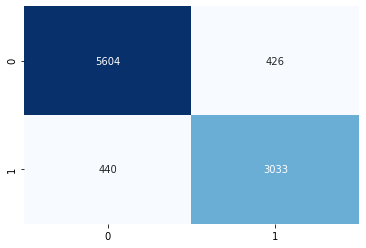

In [ ]:
cm = m.confusion_matrix(l_test,label_pred)
sns.heatmap(cm, annot = True, cbar = False, cmap =  'Blues', fmt= 'd')

# 6. Testing the model

#### 6.1 Checking the token of the char

In [ ]:
from keras.models import load_model

In [ ]:
import pickle

In [ ]:
pickle.dump(tokenizer, open('tokenizer.pkl', 'wb+'))

In [ ]:
tokenizer = pickle.load(open('tokenizer.pkl', 'rb+'))

In [ ]:
tokenizer.index_word

{1: 'a',
 2: 'e',
 3: 'n',
 4: 'i',
 5: 'r',
 6: 'l',
 7: 's',
 8: 'h',
 9: 'y',
 10: 'o',
 11: 't',
 12: 'd',
 13: 'm',
 14: 'k',
 15: 'c',
 16: 'u',
 17: 'j',
 18: 'b',
 19: 'v',
 20: 'g',
 21: 'z',
 22: 'w',
 23: 'p',
 24: 'f',
 25: 'q',
 26: 'x'}

#### 6.2 Creating function to generate the sequence of text

- we have to create a function to  generate the sequence of  text and we have to pass the same lenth of the sequence. that's why we are using pad sequence

In [ ]:
def input(n):
  q = tokenizer.texts_to_sequences(n)  # convert  text into sequences
  q = [i[0] for i in q]
  q1 = []
  q1.append(q)
  s = pad_sequences(q1, maxlen = 15, padding = 'post') # we have pass the same sequence to check the result that's why we are taking pad_sequenes
  return s

In [ ]:
tokenizer.texts_to_sequences('Zyvion')  #

[[21], [9], [19], [4], [10], [3]]

In [ ]:
input('Zyvion')  ##  checking the sequence of text  with pad_sequnece

array([[21,  9, 19,  4, 10,  3,  0,  0,  0,  0,  0,  0,  0,  0,  0]],
      dtype=int32)

#### 6.3 Creating a function to check the prediction 

In [ ]:
def pred(n):
  w = model.predict(input(n))
  w = np.argmax(w, axis = 1)
  return w[0]

### !Lets check the output

In [ ]:
pred('Zyvion')

1

In [ ]:
pred('Zyyanna') 

0

In [ ]:
pred('Zyrihanna')

0

In [ ]:
pred('Zyriel')

0

In [ ]:
pred('Zyrion')

1


# 7. Conclusion :
*` 1. Here we have made a model that the predict the gender by using their name`*
 
*`2. In Modeling I have used MultinomialNB and LSTM model`*
 
*` 3. The LSTM model performed well for this problem statement. So i selected LSTM to make prediction and I achieved 90% accuracy.which is better for this use case`*
